<a href="https://colab.research.google.com/github/FarzanaAdiba/NICU-LOS-Classification/blob/main/drug%2Bdose%2Btype.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path="/content/drive/MyDrive/ThesisWork/final_try_drgtype.csv"
df=pd.read_csv(path)
df.head()

,SUBJECT_ID,DIAGNOSIS,LOS,DRUG,DOSE_VAL_RX,DRUG_TYPE
0,2,NEWBORN,0.0918,Send 500mg Vial,1,BASE
1,2,NEWBORN,0.0918,NEO*IV*Gentamicin,15.5,MAIN
2,2,NEWBORN,0.0918,Syringe (Neonatal) *D5W*,2.4,BASE
3,2,NEWBORN,0.0918,Ampicillin Sodium,500,MAIN
4,8,NEWBORN,1.0755,Syringe (Neonatal) *D5W*,2.4,BASE


In [ ]:
df['DOSE_VAL_RX'].replace('1-2','1.5', inplace=True)
df['DOSE_VAL_RX'].replace('q12h1','12', inplace=True)
df['DOSE_VAL_RX'].replace('nan','0', inplace=True)
df['DOSE_VAL_RX'] = pd.to_numeric(df['DOSE_VAL_RX'],errors = 'coerce')
df.isnull().sum()

SUBJECT_ID      0
DIAGNOSIS       0
LOS             0
DRUG            0
DOSE_VAL_RX    20
DRUG_TYPE       0
dtype: int64

In [ ]:
 df['DOSE_VAL_RX'] = df['DOSE_VAL_RX'].fillna(0)
 df.isnull().sum()

SUBJECT_ID     0
DIAGNOSIS      0
LOS            0
DRUG           0
DOSE_VAL_RX    0
DRUG_TYPE      0
dtype: int64

In [ ]:
df['drug']=df['DRUG']+'-'+df['DRUG_TYPE']+'-'+df['DOSE_VAL_RX'].astype(str)

In [ ]:
df

,SUBJECT_ID,DIAGNOSIS,LOS,DRUG,DOSE_VAL_RX,DRUG_TYPE,drug
0,2,NEWBORN,0.0918,Send 500mg Vial,1.0,BASE,Send 500mg Vial-BASE-1.0
1,2,NEWBORN,0.0918,NEO*IV*Gentamicin,15.5,MAIN,NEO*IV*Gentamicin-MAIN-15.5
2,2,NEWBORN,0.0918,Syringe (Neonatal) *D5W*,2.4,BASE,Syringe (Neonatal) *D5W*-BASE-2.4
3,2,NEWBORN,0.0918,Ampicillin Sodium,500.0,MAIN,Ampicillin Sodium-MAIN-500.0
4,8,NEWBORN,1.0755,Syringe (Neonatal) *D5W*,2.4,BASE,Syringe (Neonatal) *D5W*-BASE-2.4
...,...,...,...,...,...,...,...
25647,32806,NEWBORN,12.5199,Ampicillin Sodium,300.0,MAIN,Ampicillin Sodium-MAIN-300.0
25648,32806,NEWBORN,12.5199,Send 500mg Vial,1.0,BASE,Send 500mg Vial-BASE-1.0
25649,32806,NEWBORN,12.5199,Multivitamin Liquid,1.0,MAIN,Multivitamin Liquid-MAIN-1.0
25650,32806,NEWBORN,12.5199,Potassium Chloride,2.5,ADDITIVE,Potassium Chloride-ADDITIVE-2.5


In [ ]:
#Labeing the LOS -----> 1 =====YES ;0=====>NO
filters = [
    (df.LOS > 7),
    (df.LOS < 7)
]
values = ["Yes", "No"]
df["label"] = np.select(filters, values).astype(str)
df["label"].value_counts()

Yes    14321
No     11331
Name: label, dtype: int64

In [ ]:
df.head(10)

,SUBJECT_ID,DIAGNOSIS,LOS,DRUG,DOSE_VAL_RX,DRUG_TYPE,drug,label
0,2,NEWBORN,0.0918,Send 500mg Vial,1.0,BASE,Send 500mg Vial-BASE-1.0,No
1,2,NEWBORN,0.0918,NEO*IV*Gentamicin,15.5,MAIN,NEO*IV*Gentamicin-MAIN-15.5,No
2,2,NEWBORN,0.0918,Syringe (Neonatal) *D5W*,2.4,BASE,Syringe (Neonatal) *D5W*-BASE-2.4,No
3,2,NEWBORN,0.0918,Ampicillin Sodium,500.0,MAIN,Ampicillin Sodium-MAIN-500.0,No
4,8,NEWBORN,1.0755,Syringe (Neonatal) *D5W*,2.4,BASE,Syringe (Neonatal) *D5W*-BASE-2.4,No
5,8,NEWBORN,1.0755,Send 500mg Vial,1.0,BASE,Send 500mg Vial-BASE-1.0,No
6,8,NEWBORN,1.0755,NEO*IV*Ampicillin Sodium,500.0,MAIN,NEO*IV*Ampicillin Sodium-MAIN-500.0,No
7,8,NEWBORN,1.0755,NEO*IV*Gentamicin,12.5,MAIN,NEO*IV*Gentamicin-MAIN-12.5,No
8,10,NEWBORN,8.0921,NEO*PO*Ferrous Sulfate Elixer,0.1,MAIN,NEO*PO*Ferrous Sulfate Elixer-MAIN-0.1,Yes
9,10,NEWBORN,8.0921,Syringe (Neonatal) *D5W*,2.4,BASE,Syringe (Neonatal) *D5W*-BASE-2.4,Yes


In [ ]:
df1=df.drop(['DIAGNOSIS','DRUG','DOSE_VAL_RX','DRUG_TYPE','LOS'], axis = 1).drop_duplicates()
df1.head(10)

,SUBJECT_ID,drug,label
0,2,Send 500mg Vial-BASE-1.0,No
1,2,NEO*IV*Gentamicin-MAIN-15.5,No
2,2,Syringe (Neonatal) *D5W*-BASE-2.4,No
3,2,Ampicillin Sodium-MAIN-500.0,No
4,8,Syringe (Neonatal) *D5W*-BASE-2.4,No
5,8,Send 500mg Vial-BASE-1.0,No
6,8,NEO*IV*Ampicillin Sodium-MAIN-500.0,No
7,8,NEO*IV*Gentamicin-MAIN-12.5,No
8,10,NEO*PO*Ferrous Sulfate Elixer-MAIN-0.1,Yes
9,10,Syringe (Neonatal) *D5W*-BASE-2.4,Yes


In [ ]:
df1=df1.groupby(['SUBJECT_ID']).agg({'drug':', '.join, 'label':'first'}).drop_duplicates()

In [ ]:
df1

,drug,label
SUBJECT_ID,,
2,"Send 500mg Vial-BASE-1.0, NEO*IV*Gentamicin-MA...",No
8,"Syringe (Neonatal) *D5W*-BASE-2.4, Send 500mg ...",No
10,"NEO*PO*Ferrous Sulfate Elixer-MAIN-0.1, Syring...",Yes
27,"Syringe (Neonatal) *D5W*-BASE-2.4, NEO*IV*Gent...",No
50,"NEO*IV*Gentamicin-MAIN-16.0, Send 500mg Vial-B...",No
...,...,...
32747,"NEO*PO*Ferrous Sulfate Elixir-MAIN-0.2, Pediat...",Yes
32748,"NEO*IV*Gentamicin-MAIN-5.5, Ampicillin Sodium-...",Yes
32783,"NEO*IV*Gentamicin-MAIN-15.5, Syringe (Neonatal...",No


In [ ]:
df1=df1.reset_index(drop=True)
df1

,drug,label
0,"Send 500mg Vial-BASE-1.0, NEO*IV*Gentamicin-MA...",No
1,"Syringe (Neonatal) *D5W*-BASE-2.4, Send 500mg ...",No
2,"NEO*PO*Ferrous Sulfate Elixer-MAIN-0.1, Syring...",Yes
3,"Syringe (Neonatal) *D5W*-BASE-2.4, NEO*IV*Gent...",No
4,"NEO*IV*Gentamicin-MAIN-16.0, Send 500mg Vial-B...",No
...,...,...
2252,"NEO*PO*Ferrous Sulfate Elixir-MAIN-0.2, Pediat...",Yes
2253,"NEO*IV*Gentamicin-MAIN-5.5, Ampicillin Sodium-...",Yes
2254,"NEO*IV*Gentamicin-MAIN-15.5, Syringe (Neonatal...",No
2255,"Ampicillin Sodium-MAIN-240.0, NEO*IV*Parentera...",No


In [ ]:
df1["label"].value_counts()

No     1355
Yes     902
Name: label, dtype: int64

In [ ]:
dfcsv=df1.to_csv('auto_3col.csv', index=False)
dfcsv
from google.colab import files
files.download("auto_3col.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(2, 4), stop_words='english')
drg_arr = tfidf.fit_transform(df1.drug).toarray()

NameError: ignored

In [ ]:
drg_arr

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.06142871, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.04792584, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
drg=pd.DataFrame(drg_arr)


In [ ]:
drg

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,3546,3547,3548,3549,3550,3551,3552,3553,3554,3555,3556,3557,3558,3559,3560,3561,3562,3563,3564,3565,3566,3567,3568,3569,3570,3571,3572,3573,3574,3575,3576,3577,3578,3579,3580,3581,3582,3583,3584,3585
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.061429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.088141,0.0,0.0,0.0,0.097528,0.0,0.0,0.0,0.0,0.154615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2252,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.145502,0.145502,0.145502,0.0,0.0,0.193859,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2253,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2254,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2255,0.0,0.047926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.068766,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df2 = pd.concat([df1, drg], axis=1)
df2

,drug,label,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,3546,3547,3548,3549,3550,3551,3552,3553,3554,3555,3556,3557,3558,3559,3560,3561,3562,3563,3564,3565,3566,3567,3568,3569,3570,3571,3572,3573,3574,3575,3576,3577,3578,3579,3580,3581,3582,3583,3584,3585
0,"Send 500mg Vial-BASE-1.0, NEO*IV*Gentamicin-MA...",No,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Syringe (Neonatal) *D5W*-BASE-2.4, Send 500mg ...",No,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"NEO*PO*Ferrous Sulfate Elixer-MAIN-0.1, Syring...",Yes,0.0,0.061429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.088141,0.0,0.0,0.0,0.097528,0.0,0.0,0.0,0.0,0.154615,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"Syringe (Neonatal) *D5W*-BASE-2.4, NEO*IV*Gent...",No,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"NEO*IV*Gentamicin-MAIN-16.0, Send 500mg Vial-B...",No,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2252,"NEO*PO*Ferrous Sulfate Elixir-MAIN-0.2, Pediat...",Yes,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.145502,0.145502,0.145502,0.0,0.0,0.193859,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2253,"NEO*IV*Gentamicin-MAIN-5.5, Ampicillin Sodium-...",Yes,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2254,"NEO*IV*Gentamicin-MAIN-15.5, Syringe (Neonatal...",No,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2255,"Ampicillin Sodium-MAIN-240.0, 

In [ ]:
df2=df2.drop('drug',axis=1)
df2

,label,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,3546,3547,3548,3549,3550,3551,3552,3553,3554,3555,3556,3557,3558,3559,3560,3561,3562,3563,3564,3565,3566,3567,3568,3569,3570,3571,3572,3573,3574,3575,3576,3577,3578,3579,3580,3581,3582,3583,3584,3585
0,No,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,No,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Yes,0.0,0.061429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.088141,0.0,0.0,0.0,0.097528,0.0,0.0,0.0,0.0,0.154615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,No,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,No,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2252,Yes,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.145502,0.145502,0.145502,0.0,0.0,0.193859,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2253,Yes,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2254,No,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2255,No,0.0,0.047926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.068766,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
X = df2.drop(columns='label')
y=df2['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1579, 3586) (678, 3586) (1579,) (678,)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)

TN, FP, FN, TP = confusion_matrix(y_test, pred).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP+TN) /(TP+FP+TN+FN)

print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))


True Positive(TP)  =  207
False Positive(FP) =  54
True Negative(TN)  =  345
False Negative(FN) =  72
Accuracy of the binary classification = 0.814


In [ ]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

accuracy, precision, recall, f1= {}, {}, {}, {}

for key in models.keys():
    
    # Fit the classifier model
    models[key].fit(X_train, y_train)
    
    # Prediction 
    predictions = models[key].predict(X_test)
    
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test,average="binary", pos_label="No")
    recall[key] = recall_score(predictions, y_test,average="binary", pos_label="No")
    f1[key]=f1_score(predictions, y_test,average="binary", pos_label="No")

In [ ]:
import pandas as pd

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall','F1-Score'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()
df_model['F1-Score'] = f1.values()
df_model

,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.814159,0.864662,0.827338,0.845588
Support Vector Machines,0.797935,0.857143,0.810427,0.833130
Decision Trees,0.756637,0.784461,0.798469,0.791403
Random Forest,0.806785,0.837093,0.835000,0.836045
Naive Bayes,0.747788,0.867168,0.745690,0.801854
K-Nearest Neighbor,0.778761,0.874687,0.777283,0.823113


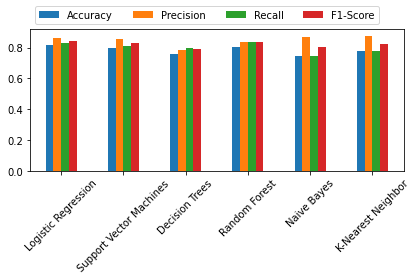

In [ ]:
ax  = df_model.plot.bar(rot=45)
ax.legend(ncol= len(models.keys()), bbox_to_anchor=(0, 1), loc='lower left', prop={'size': 10})
plt.tight_layout()